In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from google.colab import files  # For file upload in Colab

warnings.filterwarnings("ignore")



In [4]:
# Upload the dataset manually
print("Please upload the dataset file (e.g., WA_Fn-UseC_-HR-Employee-Attrition.csv)")
uploaded = files.upload()



Please upload the dataset file (e.g., WA_Fn-UseC_-HR-Employee-Attrition.csv)


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [6]:
# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
try:
    df = pd.read_csv(file_name)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()



Dataset loaded successfully.


In [7]:
# Data Exploration and Preprocessing
print("First 5 records:\n", df.head())
print("\nData Information:\n", df.info())
print("\nStatistical Summary:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



First 5 records:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpt

In [8]:
# Encode categorical features
le = LabelEncoder()
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature Selection
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
            'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
            'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
            'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']
target = 'Attrition'



In [9]:
# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [10]:
# Model Training and Evaluation - Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))




Logistic Regression Results
Accuracy: 0.891156462585034
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix:
 [[249   6]
 [ 26  13]]


In [11]:
# Model Training and Evaluation - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))




Random Forest Results
Accuracy: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294

Confusion Matrix:
 [[250   5]
 [ 35   4]]


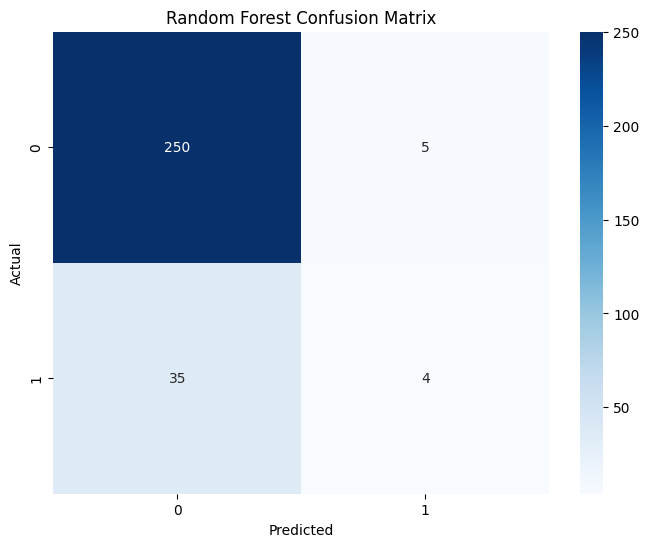

In [12]:
# Confusion Matrix Plot for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



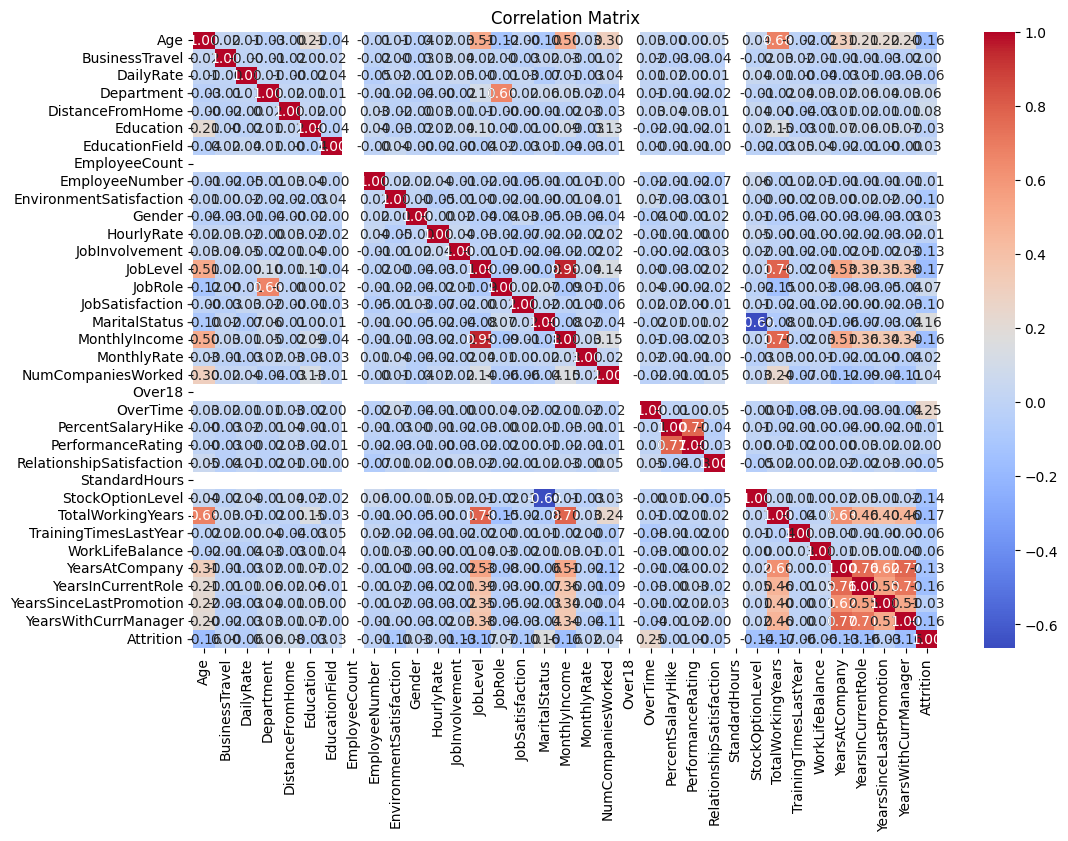

In [13]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



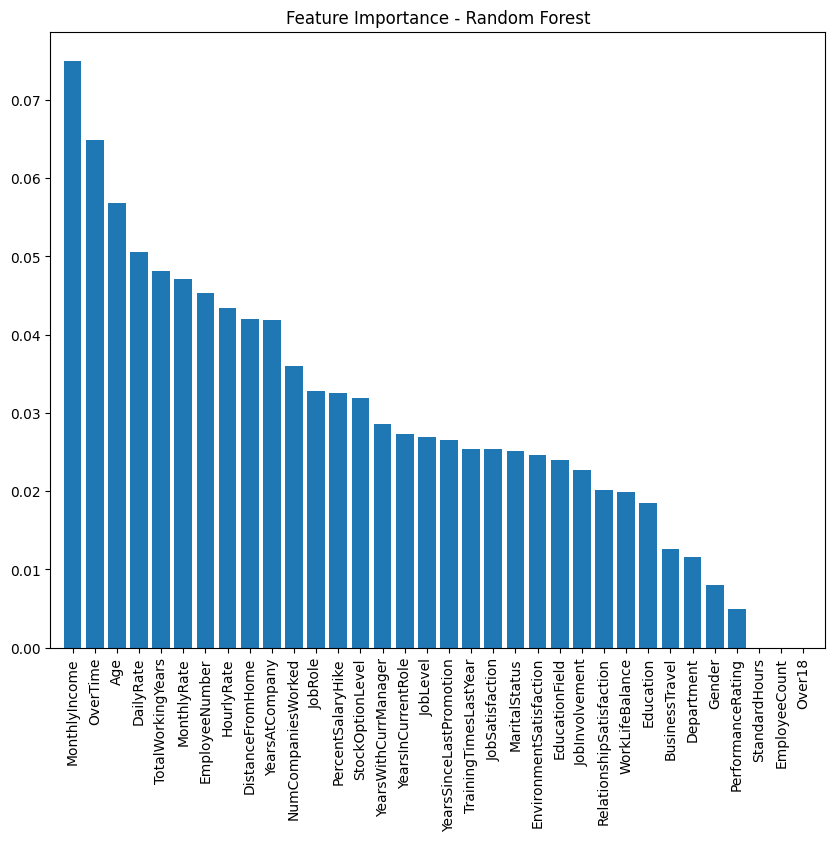

In [14]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 8))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
